# Case study on Supervised learning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reading the dataset to the python environment.

In [2]:
dt=pd.read_excel(r"C:\Users\USER\Downloads\iris (4).xls")
dt

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. Do necessary pre-processing steps.

checking for missing values

In [4]:
dt.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>],
       [<AxesSubplot:title={'center':'PL'}>, <AxesSubplot:>]],
      dtype=object)

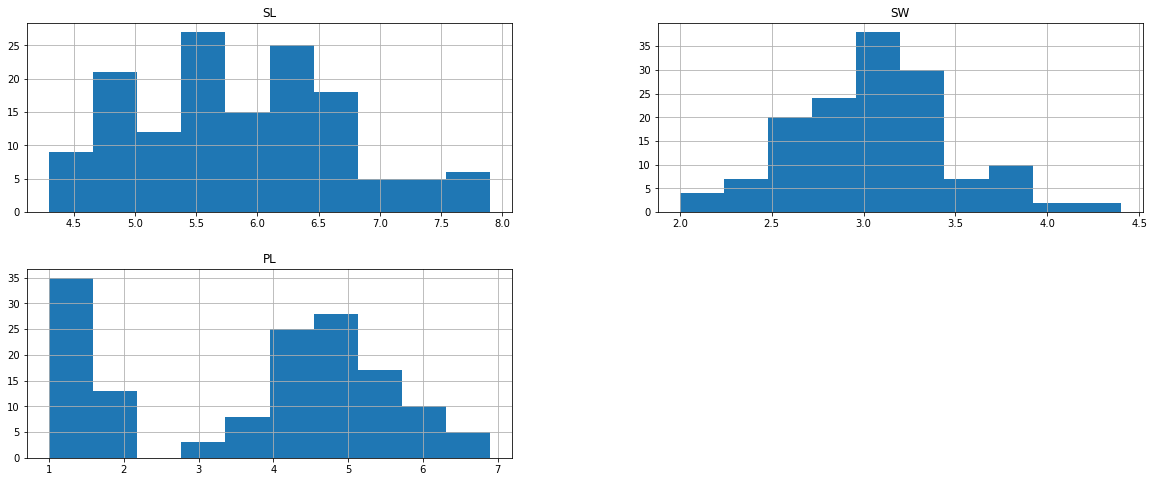

In [5]:
dt[['SL','SW','PL']].hist(figsize=(20,8))

Filling missing values with median

In [6]:
dt['SW']=dt['SW'].fillna(dt['SW'].median())
dt['SL']=dt['SL'].fillna(dt['SL'].median())
dt['PL']=dt['PL'].fillna(dt['PL'].median())

In [7]:
dt.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [8]:
sd=pd.get_dummies(dt)
sd

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.40,0.2,1,0,0
1,4.9,3.0,1.40,0.2,1,0,0
2,5.8,3.2,1.30,0.2,1,0,0
3,4.6,3.1,1.50,0.2,1,0,0
4,5.0,3.6,1.40,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,0,0,1
146,6.3,2.5,5.00,1.9,0,0,1
147,6.5,3.0,4.35,2.0,0,0,1
148,6.2,3.4,5.40,2.3,0,0,1


In [9]:
x=dt.drop('Classification',axis=1)
y=dt['Classification']
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object


# 3. Finding out which classification model gives the best result to predict iris species


# Logistic Regression

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)
x_train.shape

(112, 4)

In [11]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
pred=model.predict(x_test)
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

print( classification_report(pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       0.93      1.00      0.97        14
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
print('accuracy_score:',accuracy_score(pred,y_test))

accuracy_score: 0.9736842105263158


Logistic Regression gives the accuracy score 0.97

In [36]:
print(confusion_matrix(y_test,pred))

[[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


 Only one missclassification.

In [14]:
y_test.value_counts()

Iris-setosa        15
Iris-virginica     12
Iris-versicolor    11
Name: Classification, dtype: int64

In [15]:
l=pd.DataFrame(pred)
l.value_counts()

Iris-setosa        14
Iris-versicolor    12
Iris-virginica     12
dtype: int64

# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
value=[]
nbs=np.arange(3,15)
for k in nbs:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,pred)
    value.append(acc)
value

[0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

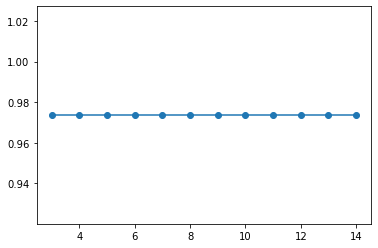

In [17]:
plt.plot(nbs,value,'o-')

In [18]:
classifier =KNeighborsClassifier(n_neighbors=7,metric='euclidean')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [19]:
print('accuracy_score:',accuracy_score(y_test,pred))

accuracy_score: 0.9736842105263158


# SVM

In [20]:
from sklearn import svm
dtc=svm.SVC()
dtc.fit(x_train,y_train)
ypred=dtc.predict(x_test)
accuracy_score(y_test,ypred)

0.9736842105263158

In [21]:
print(classification_report(y_test,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [37]:
confusion_matrix(y_test,ypred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predy=dtc.predict(x_test)
accuracy_score(y_test,predy)

1.0

In [26]:
print(classification_report(y_test,predy))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



value equalsto 1 so Decision Tree gives the best result.

# Random Forest Algorithm

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predy=rf.predict(x_test)
accuracy_score(y_test,predy)

1.0

In [32]:
feature_imp = pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100
feature_imp

PW    46.603512
PL    37.260895
SL    11.395769
SW     4.739824
dtype: float64

In [33]:
pred_y=rf.predict(x_test)
pred_y

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [34]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print(classification_report(y_test,pred_y))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [35]:
confusion_matrix(y_test,pred_y)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

Random Forest also gives the best result.